**E-COMMERCE SERVICE REVIEW - SENTIMENT ANALYSIS**

Import the necessary libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Data Processing**

In [57]:
#Load the data

data = pd.read_csv("/content/reviews1.csv", encoding ='ISO-8859-1')

In [58]:
data.shape

(3312, 7)

In [59]:
data.head()

,Username,Total reviews,Location,Date,Review,Rating,feeling
0,Richard,37K reviews,US,2025-02-14T22:43:05.000Z,Just when you thought Customer Disservice coul...,1.0,anger
1,Ronald Mitzel,3.6K reviews,US,2025-02-14T06:03:30.000Z,Worst delivery of any store in the United Stat...,1.0,anger
2,Armando Garcia Luna,14K reviews,US,2025-02-12T03:01:21.000Z,Poor customer service & ScamPoor customer serv...,1.0,anger
3,Jessica Laurie,3reviews,US,2025-02-14T03:06:45.000Z,WalmartWalmart. Where do I even begin? It's ...,1.0,anger
4,Mike Doyle,1review,US,2025-02-14T21:37:21.000Z,I bought a cellphone from an OSLI bought a cel...,1.0,anger


In [60]:
column_names = ['username', 'totalreviews', 'location', 'date', 'review', 'rating', 'feeling']
data = pd.read_csv("/content/reviews1.csv", names = column_names, encoding ='ISO-8859-1')

In [61]:
data.shape

(3313, 7)

In [62]:
data.head()

,username,totalreviews,location,date,review,rating,feeling
0,Username,Total reviews,Location,Date,Review,Rating,feeling
1,Richard,37K reviews,US,2025-02-14T22:43:05.000Z,Just when you thought Customer Disservice coul...,1.0,anger
2,Ronald Mitzel,3.6K reviews,US,2025-02-14T06:03:30.000Z,Worst delivery of any store in the United Stat...,1.0,anger
3,Armando Garcia Luna,14K reviews,US,2025-02-12T03:01:21.000Z,Poor customer service & ScamPoor customer serv...,1.0,anger
4,Jessica Laurie,3reviews,US,2025-02-14T03:06:45.000Z,WalmartWalmart. Where do I even begin? It's ...,1.0,anger


In [63]:
data.isnull().sum()

,0
username,432
totalreviews,0
location,433
date,432
review,432
rating,432
feeling,0


In [64]:
data['feeling'].value_counts()

,count
feeling,
anger,2309
neutral,432
joy,248
happy,162
sad,161
feeling,1


**Stemming**

In [65]:
port_stem = PorterStemmer()

In [66]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [67]:
print(data.columns)

Index(['username', 'totalreviews', 'location', 'date', 'review', 'rating',
       'feeling'],
      dtype='object')


In [68]:
data['stemmed_content'] = data['Review'].apply(stemming)

KeyError: 'Review'

In [69]:
data['stemmed_content'] = data['review'].astype(str).apply(stemming)

In [70]:
data.head()

,username,totalreviews,location,date,review,rating,feeling,stemmed_content
0,Username,Total reviews,Location,Date,Review,Rating,feeling,review
1,Richard,37K reviews,US,2025-02-14T22:43:05.000Z,Just when you thought Customer Disservice coul...,1.0,anger,thought custom disservic worsei use think tie ...
2,Ronald Mitzel,3.6K reviews,US,2025-02-14T06:03:30.000Z,Worst delivery of any store in the United Stat...,1.0,anger,worst deliveri store unit statesi paid month d...
3,Armando Garcia Luna,14K reviews,US,2025-02-12T03:01:21.000Z,Poor customer service & ScamPoor customer serv...,1.0,anger,poor custom servic scampoor custom servic made...
4,Jessica Laurie,3reviews,US,2025-02-14T03:06:45.000Z,WalmartWalmart. Where do I even begin? It's ...,1.0,anger,walmartwalmart even begin like circu day park ...


In [71]:
print(data['stemmed_content'])

0                                                  review
1       thought custom disservic worsei use think tie ...
2       worst deliveri store unit statesi paid month d...
3       poor custom servic scampoor custom servic made...
4       walmartwalmart even begin like circu day park ...
                              ...                        
3308                                                  nan
3309                                                  nan
3310                                                  nan
3311                                                  nan
3312                                                  nan
Name: stemmed_content, Length: 3313, dtype: object


In [72]:
print(data['feeling'])

0       feeling
1         anger
2         anger
3         anger
4         anger
         ...   
3308    neutral
3309    neutral
3310    neutral
3311    neutral
3312    neutral
Name: feeling, Length: 3313, dtype: object


In [73]:
X = data['stemmed_content'].values
Y = data['feeling'].values

In [74]:
print(X)

['review'
 'thought custom disservic worsei use think tie comcast worst custom disservic question moot winner walmart foreign cd rep idiot chat bot exhaust telephon menu system bent prevent access carbon life form inscrut web site design execut eighth grade comput nerd array problem everyth goe plan never walmart certainli place shop ok groceri jumbo quantiti larger profit margin smaller unit woe unto thing like best laid plan mice men go awri breathtak incompet peopl softwar organ strain one credul believ experi withhold judgement date experi februari'
 'worst deliveri store unit statesi paid month deliveri servic sometim deliveri come time come sometim item miss call walmart tell act like fault play victim incompet employe order lettuc recent let head lettuc black rot dare send take advantag senior especi know get store depend lousiest deliveri servic unit state compani would rather pay month groceri deliv know go get order done walmart absolut worstdat experi februari'
 ... 'nan' 'n

In [75]:
print(Y)

['feeling' 'anger' 'anger' ... 'neutral' 'neutral' 'neutral']


Split the data into training data and testing data

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [77]:
print(X.shape, X_train.shape, X_test.shape)

(3313,) (2650,) (663,)


In [78]:
print(X_train)

['think carewhat check regist open peopl stand line self servic saturday afternoon madden date experi novemb'
 'place onlin order place onlin order three show walmart alway insist wait hour refund spent hour phone get run around hire reput deliveri peopl refund done delet account shop store reliabl place shop line deliveri never make date experi septemb'
 'dirti littl trick avoid advertis free ship sent great report earlier today pick store experi simpl quick extrem upset care make complet order divid littl bit littl bitti order qualifi free ship mention inconveni deliveri strung till never sure never furthermor everi time go order someth still left sit cart includ larg order thoroughli disgust use order anymor get want elsewher dirti trick avoid promis free ship larger order date experi novemb'
 ...
 'famili importantcc xxxorder robot vacuum arriv american flag nake girl sister open church church group nun priest embarrass live ri live tn brought tee shirt nake call pervert block phon

In [79]:
print(X_test)

['horribl line chat custom servicei love wal mart custom servic onlin chat stink packag lax sinc nov first custom svc chat person connect site pay upto tri find packag tri send messag custom svc sent track number connect account info want phone number e mail sent email mail want bank name name said gave bank name want last digit card question want amount order address ask info account order question give person info secur site said said site might secur allof info know never identifi expect info end chat want know magnifi glass date experi decemb'
 'tiffani walmart custom servic rep hellto concern spoke crystal walmart even convers person spoke previou person wait hold min repres told layman term go fli kite travel capac even remot travel kearni walmart time constantli refus email return label item purchas total defect charg keep charg want return defect item receiv refund shop place told quot tiffani fight financi institut total unaccept say one person fight financi institut option to

Convert the textual data into numerical data

In [80]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [82]:
print(X_train)

  (0, 7468)	0.20423851100327187
  (0, 1106)	0.4341926462141787
  (0, 1229)	0.17949344090690467
  (0, 6017)	0.2614551433345408
  (0, 5089)	0.21206586463484575
  (0, 5371)	0.16429548517916054
  (0, 7002)	0.25044653602265027
  (0, 4219)	0.2021991087885986
  (0, 6502)	0.2317854780401269
  (0, 6544)	0.11808426158837206
  (0, 6385)	0.3047044855253129
  (0, 112)	0.33102453684315347
  (0, 4358)	0.4341926462141787
  (0, 1799)	0.07237854625609434
  (0, 2566)	0.060409811686410804
  (0, 4935)	0.16159233709723264
  (1, 5371)	0.1212007736310386
  (1, 4219)	0.14916227543295354
  (1, 1799)	0.05339365102432675
  (1, 2566)	0.04456431595374747
  (1, 5492)	0.36110195937364015
  (1, 5061)	0.20282946753470998
  (1, 5113)	0.1497793740003055
  (1, 7488)	0.1736558535453197
  (1, 6702)	0.14178622621756845
  :	:
  (2647, 927)	0.10183790161954742
  (2647, 4505)	0.1353534502649491
  (2647, 8030)	0.2530682474881016
  (2647, 3215)	0.13836130408004035
  (2647, 4957)	0.15188628751704691
  (2647, 1294)	0.29254582442712

In [83]:
print(X_test)

  (0, 41)	0.11492198704016607
  (0, 74)	0.06629711809596232
  (0, 267)	0.07724176979468818
  (0, 408)	0.052162258498987875
  (0, 579)	0.13781207668643314
  (0, 1086)	0.0539259402985761
  (0, 1218)	0.27804816259026843
  (0, 1519)	0.20177650637613812
  (0, 1748)	0.13978816432784694
  (0, 1799)	0.022541312718696013
  (0, 1847)	0.05047121169022956
  (0, 2012)	0.11708342079373023
  (0, 2359)	0.05845736174594992
  (0, 2397)	0.0673458329948308
  (0, 2559)	0.07311954431771446
  (0, 2566)	0.01881381330432932
  (0, 2761)	0.060118228971991025
  (0, 2773)	0.0596021960553564
  (0, 3033)	0.0673458329948308
  (0, 3074)	0.05374678798690279
  (0, 3082)	0.0980507116838192
  (0, 3471)	0.06629711809596232
  (0, 3561)	0.12377834283433613
  (0, 3697)	0.43523002603478006
  (0, 4028)	0.10737499983628747
  :	:
  (659, 4701)	0.24637318267761457
  (659, 5233)	0.24158294316706005
  (659, 5456)	0.15624997163637167
  (659, 5751)	0.16296299253784394
  (659, 5803)	0.18575710835381015
  (659, 5998)	0.08232037878717502

Training the Machine Learning Model

## **Logistic Regression**

In [84]:
model = LogisticRegression(max_iter=1000)

In [85]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Evaluation for the Logistic Regression Model (Accuracy Score & the Other Performance Metrics)

In [88]:
# Accuracy score on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [90]:
print('Accuracy Score on the training data:', training_data_accuracy)

Accuracy Score on the training data: 0.88


In [91]:
# Accuracy score on the test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [92]:
print('Accuracy Score on the test data:', test_data_accuracy)

Accuracy Score on the test data: 0.8431372549019608


**Model accuracy = 84.3%**

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

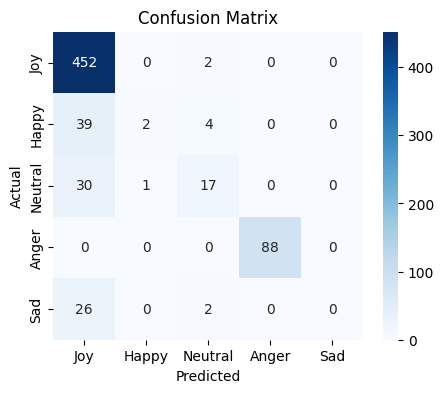

In [116]:
# Confusion Matrix

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Joy", "Happy", "Neutral","Anger", "Sad"], yticklabels=["Joy", "Happy", "Neutral","Anger", "Sad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [117]:
# Classification Report (Precision, Recall, F1-score)

print("\n Classification Report:\n")
print(classification_report(Y_test, Y_pred, target_names=["Joy", "Happy", "Neutral","Anger", "Sad"]))


 Classification Report:

              precision    recall  f1-score   support

         Joy       0.83      1.00      0.90       454
       Happy       0.67      0.04      0.08        45
     Neutral       0.68      0.35      0.47        48
       Anger       1.00      1.00      1.00        88
         Sad       0.00      0.00      0.00        28

    accuracy                           0.84       663
   macro avg       0.63      0.48      0.49       663
weighted avg       0.79      0.84      0.79       663



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Save the trained modle**

In [93]:
import pickle

In [94]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

**Using the saved model for future predictions**

In [99]:
# Loading the saved model

loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [100]:
X_new = X_test[333]
print(Y_test[333])

prediction = model.predict(X_new)
print(prediction)

anger
['anger']


In [101]:
X_new = X_test[143]
print(Y_test[143])

prediction = model.predict(X_new)
print(prediction)

anger
['anger']


In [102]:
X_new = X_test[666]
print(Y_test[666])

prediction = model.predict(X_new)
print(prediction)

IndexError: row index (666) out of range

In [104]:
X_new = X_test[662]
print(Y_test[662])

prediction = model.predict(X_new)
print(prediction)

anger
['anger']


## **CNN Model**